# INSTAGRAM VISITS DATASET
#### This dataset captures Instagram user's visit scores and their spending rank (on a scale of 0 to 100). The goal is to analyze and group users into distinct clusters based on their behaviors, enabling insights into user engagement and spending potential. The dataset is suitable for unsupervised machine learning techniques, which can help identify patterns and group users effectively.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

### Load Dataset

In [2]:
dataset = pd.read_csv("E:\DataScience\ML\ML_Project_6(on_clustering)\InstaVisits_dataset.csv")
data = pd.DataFrame(dataset)
print(data.to_string())

      User ID  Instagram visit score  Spending_rank(0 to 100)
0           0                     63                24.050708
1           1                     61                25.223290
2           2                    104                18.528245
3           3                     82                86.890232
4           4                     14                31.492397
5           5                     74                81.195314
6           6                     83                88.119729
7           7                     71                87.468356
8           8                     42                80.829564
9           9                     79                25.966622
10         10                     94                24.465674
11         11                     30                30.975041
12         12                     62                23.936884
13         13                     19                14.216564
14         14                     36                23.461313
15      

### Basic Information

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


### Data Cleaning

#### Check Null Values and Duplicates

In [4]:
data.isna().sum()
data.dropna(inplace=True)

#### Rename Attributes

In [5]:
data.rename(columns = {'User ID':'User_ID', 'Instagram visit score':'Insta_visit_score', 'Spending_rank(0 to 100)':'Spending_rank'}, inplace = True)

#### Check Outliers

<Axes: >

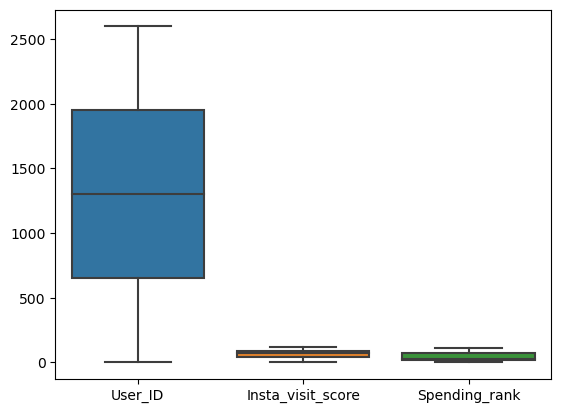

In [6]:
sns.boxplot(data)

### Statistical Analysis

In [7]:
print(data.describe(include='all'))

           User_ID  Insta_visit_score  Spending_rank
count  2600.000000        2600.000000    2600.000000
mean   1299.500000          63.323462      42.848408
std     750.699674          26.579760      28.758349
min       0.000000           5.000000       0.940709
25%     649.750000          38.000000      19.452098
50%    1299.500000          72.000000      28.013082
75%    1949.250000          86.000000      72.116945
max    2599.000000         118.000000     107.349821


#### Correlation

                   User_ID  Insta_visit_score  Spending_rank
User_ID               1.00               0.01           0.03
Insta_visit_score     0.01               1.00           0.05
Spending_rank         0.03               0.05           1.00


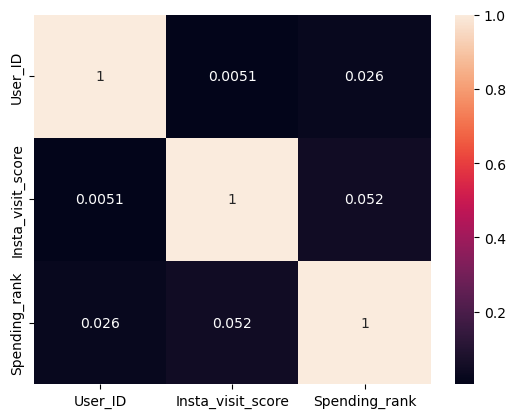

In [8]:
corre = data.corr()
print(np.around(corre, decimals = 2))

# plot
sns.heatmap(corre, annot = True)
plt.show()

#### Covariance

                     User_ID  Insta_visit_score  Spending_rank
User_ID            563550.00             101.74         552.88
Insta_visit_score     101.74             706.48          39.49
Spending_rank         552.88              39.49         827.04


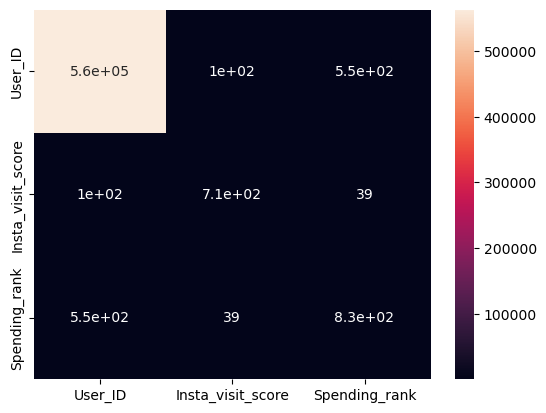

In [9]:
cova = data.cov()
print(np.around(cova, decimals = 2))

# plot
sns.heatmap(cova, annot = True)
plt.show()

### Build Clustering Model

#### Select and Standardize features

In [10]:
features = data[['Insta_visit_score', 'Spending_rank']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### Determining optimal no. of clusters using the elbow method

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
print(wcss)

[5199.999999999999, 2894.453828798832, 1098.5329678608914, 593.5744810683259, 364.8689617008573, 326.9239072363687, 295.0189039605849, 271.2170869770177, 246.2375018015448, 225.53148942462653]


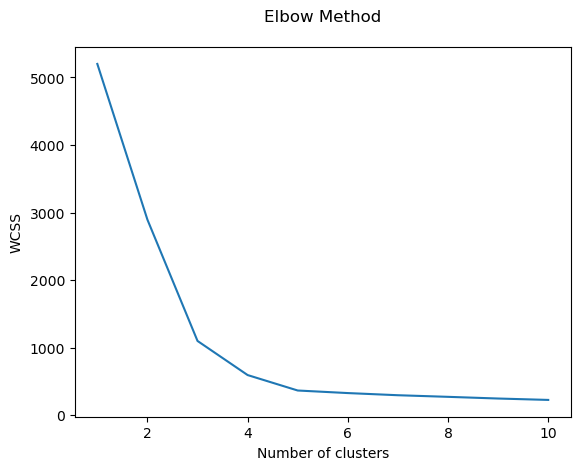

In [12]:
# plot the elbow method

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method\n')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# determined the optimal number of clusters as k = 4

#### Fits K-Means Model with k = 4

In [13]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
data['cluster'] = kmeans.fit_predict(scaled_features)
print(data['cluster'])

0       1
1       1
2       1
3       2
4       0
       ..
2595    0
2596    0
2597    2
2598    1
2599    3
Name: cluster, Length: 2600, dtype: int32


#### Correlation of Clustered Data

                   User_ID  Insta_visit_score  Spending_rank  cluster
User_ID               1.00               0.01           0.03     0.00
Insta_visit_score     0.01               1.00           0.05     0.17
Spending_rank         0.03               0.05           1.00     0.73
cluster               0.00               0.17           0.73     1.00


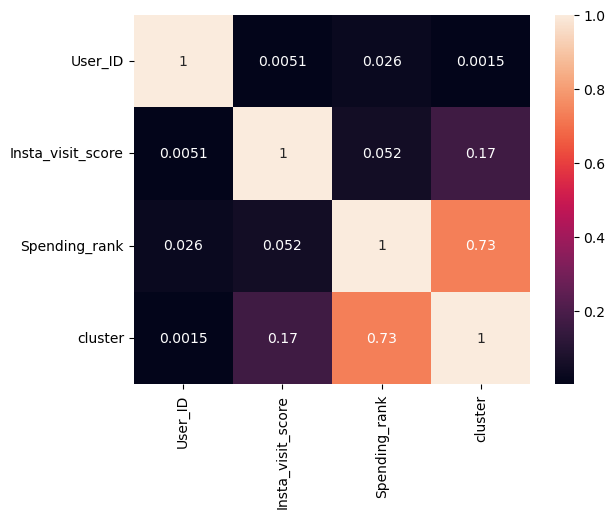

In [14]:
corre1 = data.corr()
print(np.around(corre1, decimals = 2))

# plot
sns.heatmap(corre1, annot = True)
plt.show()

#### Calculate the mean of the features for each cluster

In [15]:
cluster_mean = data.groupby('cluster').mean()
print(cluster_mean)

             User_ID  Insta_visit_score  Spending_rank
cluster                                               
0        1306.223386          27.296684      24.309119
1        1283.451801          83.243427      19.872486
2        1330.385000          79.615000      85.024498
3        1284.745000          39.350000      65.132485


#### Visualizing the clusters

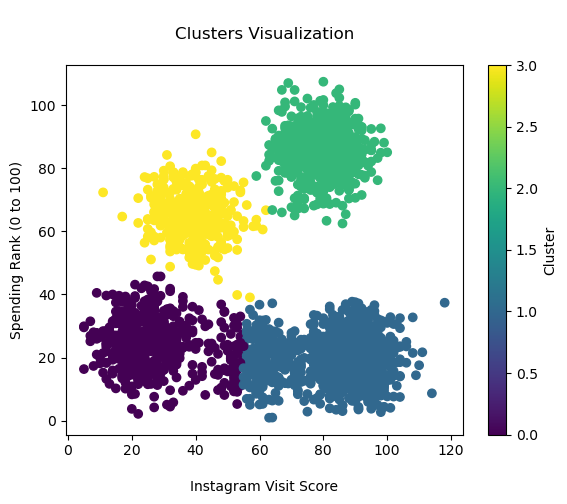

In [16]:
plt.scatter(data['Insta_visit_score'], data['Spending_rank'], c = data['cluster'], cmap='viridis')
plt.title('\nClusters Visualization\n')
plt.xlabel('\nInstagram Visit Score')
plt.ylabel('Spending Rank (0 to 100)')
plt.colorbar(label = 'Cluster')
plt.show()

#### Predict Silhouette Score

In [17]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6455794205226602


#### Applying PCA

In [18]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization

pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(scaled_features)

# Create a DataFrame for the reduced features and clusters

reduced_data = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_data['cluster'] = data['cluster']

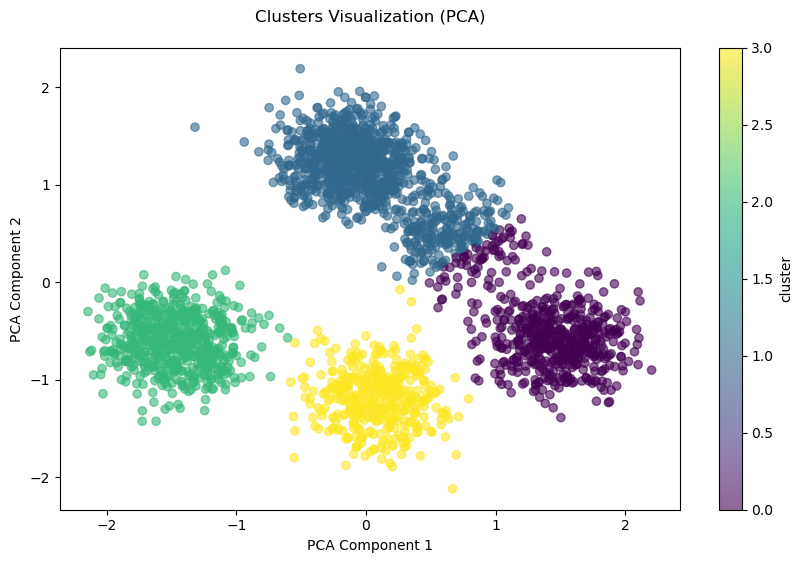

In [19]:
# Plotting the clusters after applying PCA

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data['PCA1'], reduced_data['PCA2'], c = reduced_data['cluster'], cmap='viridis', alpha = 0.6)
plt.title('Clusters Visualization (PCA)\n')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='cluster')
plt.show()

In [20]:
# predicting score after applying PCA
 
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(reduced_features, reduced_data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6455794205226602
